In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv("All Year Olympic Dataset (with 2020 Tokyo Olympics).csv")
df.sample(5)

,Unnamed: 0,Name,Sex,Age,Team,Games,Year,Season,Sport,Medal
24168,24168,Isabelle Bori-Bgard,F,20.0,France,1980 Summer,1980,Summer,Fencing,3
258264,258264,Andreas John Weigand,M,30.0,United States,1976 Summer,1976,Summer,Canoeing,0
77244,77244,Olga Anatolyevna Gayeva,F,21.0,Belarus,2004 Summer,2004,Summer,Cycling,0
88585,88585,Yrj Ilmari Hakoila,M,20.0,Finland,1952 Summer,1952,Summer,Rowing,0
238699,238699,Andreas Thiel,M,32.0,Germany,1992 Summer,1992,Summer,Handball,0


In [16]:

df['Age'].describe()

count    266169.000000
mean         25.657364
std           6.494015
min          10.000000
25%          21.000000
50%          25.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

C:\python3.9.7\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

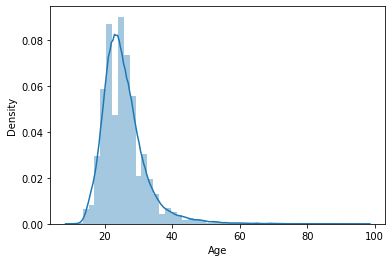

In [17]:
# sns.distplot(df['Height'])
sns.distplot(df["Age"])

C:\python3.9.7\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

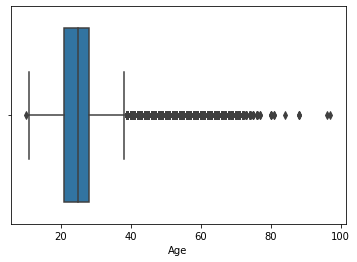

In [18]:
sns.boxplot(df["Age"])

In [79]:
upper_limit=df['Age'].quantile(0.95)
upper_limit

37.0

In [80]:
lower_limit=df['Age'].quantile(0.05)
lower_limit

18.0

In [81]:
new_df=df[(df['Age']< upper_limit) & (df['Age']>lower_limit)]
new_df.shape

(230291, 10)

In [85]:
len(df)-len(new_df)  #so many outliers 

45352

In [82]:
new_df['Age'].describe()

count    230291.000000
mean         25.282543
std           4.134495
min          19.000000
25%          22.000000
50%          25.000000
75%          28.000000
max          36.000000
Name: Age, dtype: float64

C:\python3.9.7\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

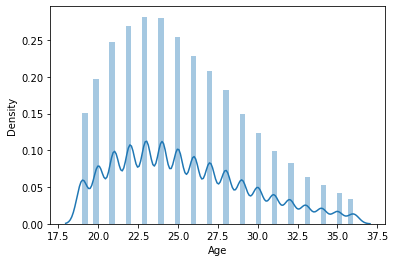

In [83]:
sns.distplot(new_df["Age"])

C:\python3.9.7\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

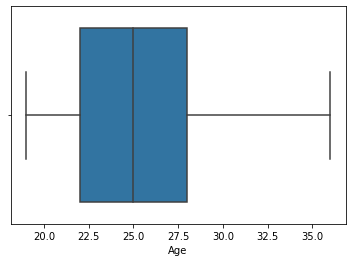

In [84]:
sns.boxplot(new_df['Age'])

### capping : Winsorization`

In [87]:
import numpy as np
df['Age']=np.where (
          df['Age'] >= upper_limit,
        upper_limit,
        np.where(df['Age'] <= lower_limit,
        lower_limit,
        df['Age'])
)

In [88]:
df.shape

(275643, 10)

C:\python3.9.7\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

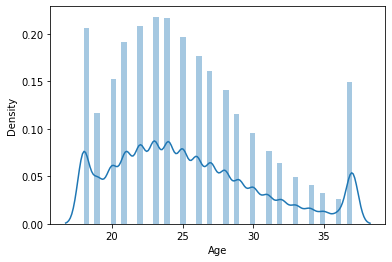

In [89]:
sns.distplot(df["Age"])

C:\python3.9.7\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

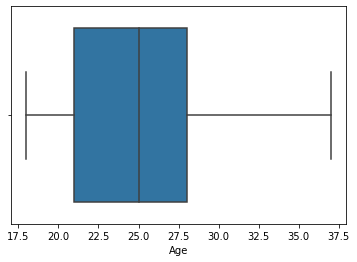

In [90]:
sns.boxplot(df['Age'])